### Shadow Attack Adversarial Example Detection

files needed:
* shadow vs clean dataset
* no turn image (for individual tests)

In [ ]:
import zipfile
import os
from PIL import Image
import shutil

In [ ]:
cleanadv = ('clean_adversarial.zip')
cleanadv_ref = zipfile.ZipFile(cleanadv, 'r')
cleanadv_ref.extractall()

In [ ]:
cleanadv_ref.close()

In [ ]:
os.mkdir('/content/train')
os.mkdir('/content/test')

In [ ]:
shutil.move('attack/attacktrain', 'train/attack')
shutil.move('attack/attacktest', 'test/attack')

'test/attack'

In [ ]:
shutil.move('clean/cleantrain', 'train/clean')
shutil.move('clean/cleantest', 'test/clean')

'test/clean'

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(

    rescale = 1.0/255.0,
    zoom_range = 0.2,
    horizontal_flip = 'True'
)

test_gen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
trainingx = train_gen.flow_from_directory('train',
                                          target_size = (256,256),
                                          batch_size = 16,
                                          class_mode = 'binary')

Found 1290 images belonging to 2 classes.


In [ ]:
testx = test_gen.flow_from_directory('test',
                                          target_size = (256,256),
                                          batch_size = 16,
                                          class_mode = 'binary')

Found 321 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16,
                        kernel_size = 2,
                        input_shape = [256, 256, 3],
                        activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))
model.add(Conv2D(filters = 16,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Third convolution layer
model.add(Conv2D(filters = 16,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Fourth convolution layer
model.add(Conv2D(filters = 16,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))
model.add(Flatten())
model.add(Dense(units = 16,
                   activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      1040      
                                                                 
 dropout (Dropout)           (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 16)        1

In [ ]:
optimizer = tf.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = 'binary_crossentropy', #how the amount of error is calculated
              metrics = ['accuracy']) #tested on the accuracy

In [ ]:
model.fit(x = trainingx,
          epochs = 3,
          validation_data = testx)

Epoch 1/3
81/81 [==============================] - 92s 1s/step - loss: 0.3475 - accuracy: 0.8403 - val_loss: 0.4324 - val_accuracy: 0.8785
Epoch 2/3
81/81 [==============================] - 91s 1s/step - loss: 0.1321 - accuracy: 0.9527 - val_loss: 0.3265 - val_accuracy: 0.9190
Epoch 3/3
81/81 [==============================] - 91s 1s/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.2105 - val_accuracy: 0.9813


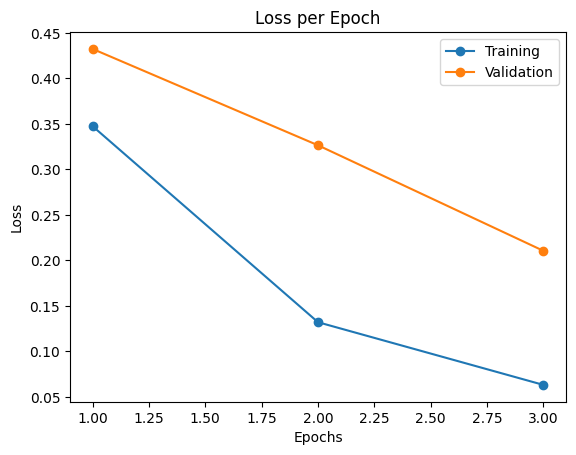

In [ ]:
epochs = [1,2,3]
train_loss = [0.3475,0.1321,0.0632]
val_loss = [0.4324,0.3265,0.2105]


# Plotting
plt.plot(epochs, train_loss, marker='o', label='Training')
plt.plot(epochs, val_loss, marker='o', label='Validation')

# Labeling and customization
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graph
plt.show()

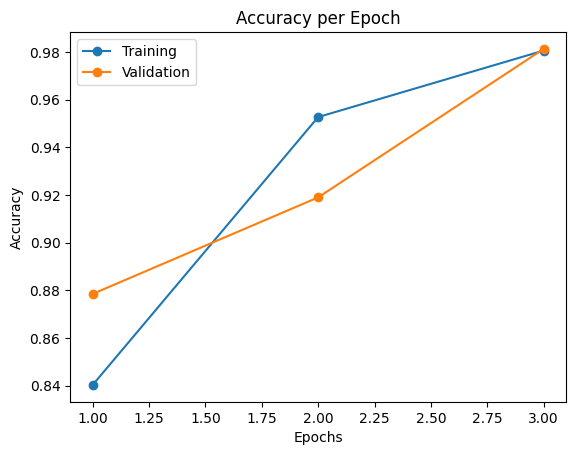

In [ ]:
epochs = [1,2,3]
train_acc = [0.8403, 0.9527,0.9806]
val_acc = [0.8785, 0.9190, 0.9813]


# Plotting
plt.plot(epochs, train_acc, marker='o', label='Training')
plt.plot(epochs, val_acc, marker='o', label='Validation')

# Labeling and customization
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the graph
plt.show()

### individual predictions

In [ ]:
sign = Image.open('noturn.jpg')
new_sign = sign.resize((256,256))

In [ ]:
clean = np.expand_dims(new_sign, axis=0)

In [ ]:
attack = Image.open('attack.png')
attac = attack.resize((256,256))
#plt.imshow(attack)

In [ ]:
cleanimg = Image.open('train/clean/road103.png')
plt.imshow(cleanimg)

In [ ]:
attacked = np.expand_dims(attac, axis=0)
pred = model.predict(attacked)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[9.518238e-12]]


In [ ]:
print(pred.shape)
pred[:1]

In [ ]:
prediction = model.predict(clean)
print(prediction)

1/1 [==============================] - 0s 35ms/step
[[1.]]


In [ ]:
def make_label(prediction):
  if (prediction <= [[0.5]]):
    return "Attack"
  else:
    return "Clean"

Text(0.5, 1.0, 'Predicted - Clean')

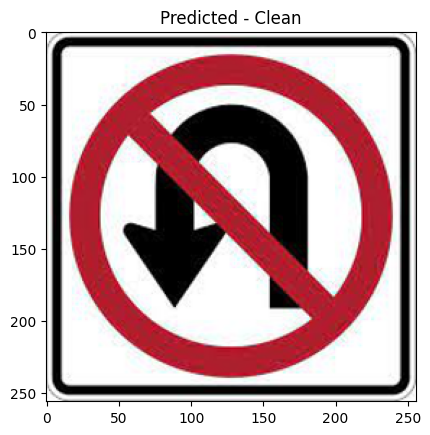

In [ ]:
plt.imshow(new_sign)
plt.title("Predicted - {}".format(make_label(prediction)))

Text(0.5, 1.0, 'Predicted - Attack')

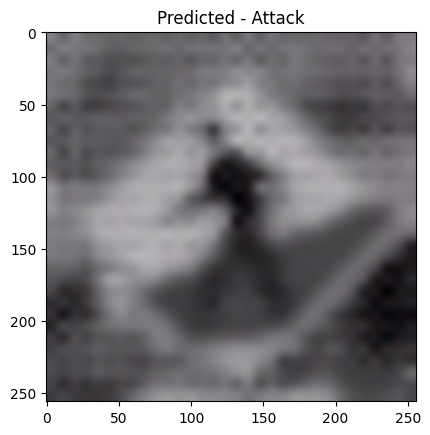

In [ ]:
plt.imshow(attack)
plt.title("Predicted - {}".format(make_label(pred)))

In [ ]:
model.save('shadow_attack_trained_cnn.h5')

### making the saliency maps

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

In [ ]:
filters, biases = model.layers[0].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [ ]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 # get the filter
 f = filters[:, :, :, i]
 # plot each channel separately
 for j in range(3):
 # specify subplot and turn of axis
  ax = plt.subplot(n_filters, 3, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
 plt.imshow(f[:, :, j], cmap='autumn')
 ix += 1
# show the figure
plt.show()

In [ ]:
#testing it on the u-turn image

In [ ]:
for i in range(len(model.layers)):
 layer = model.layers[i]
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
 # summarize output shape
 print(i, layer.name, layer.output.shape)

In [ ]:
from keras.models import Model

In [ ]:
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
# load the image with the required shape
img = load_img('noturn.jpg', target_size=(256, 256))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
#img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

In [ ]:
square = 5
ix = 1
for _ in range(square):
 for _ in range(square):
 # specify subplot and turn of axis
  ax = plt.subplot(square, square, ix)
  ax.set_xticks([])
  ax.set_yticks([])
 # plot filter channel in grayscale
 plt.imshow(feature_maps[0, :, :, ix-1], cmap='Greens')
 ix += 1
# show the figure
plt.show()

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories = ['clean', 'attack']

flat_data_arr = [] #input
target_arr = [] #output

trainset = 'train/'

for i in categories:
   print(f'loading... category : {i}')
   path=os.path.join(trainset,i) #loads train/attack or train/clean
   for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(256,256,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
   print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

In [ ]:
df_train=pd.DataFrame(flat_data)
df_train['Target']=target
df_train.shape

In [ ]:
#input data
x_train=df_train.iloc[:,:-1]
#output data
y_train=df_train.iloc[:,-1]

In [ ]:
model.compile()

In [ ]:
model.evaluate(x_train, y_train, verbose=2)

In [ ]:
os.mkdir('clean_adv_dataset')
shutil.move('test', 'clean_adv_dataset/test')
shutil.move('train', 'clean_adv_dataset/train')

In [ ]:
shutil.make_archive('clean_adv_dataset', 'zip')